In [1]:
import pandas as pd
import numpy as np

main_data = pd.read_csv('dataverse_files/main_data.tab', sep="\t")

### Q1: Overview

After we have read the data and cleaned it based on `time` column, we create a DataFrame with the columns we need, to describe them and replicate SI.3.1.

In [2]:
s1_3_1 = main_data.dropna(axis=0, subset='time')
s1_3_1 = s1_3_1[[ 'repression', 'lnrepression', 'dumrepression', 'hostcity', 'prox_hotelonly', 'prox_hotelpress', 
    'time', 'time2', 'time3', 'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974',  
    'lnrepression70_77', 'latitude', 'lnstrikes', 'lnlag_strikes', 'lnlag2_strikes', 
    'zone1', 'zone2', 'zone3', 'zone4', 'zone5']]

# Latex notation for subscripts and superscripts
s1_3_1 = s1_3_1.rename(
    columns={
        'repression': '$Repression \ Events$',
        'lnrepression': '$Repression \ Events^a$',
        'dumrepression': '$Repression \ Events$',
        'hostcity': '$Host \ City$',
        'prox_hotelonly': '$Proximity \ to \ Hotel$',
        'prox_hotelpress': '$Proximity \ to \ Journalist \ Venue$',
        'time': '$Time$',
        'time2': '$Time^2$',
        'time3': '$Time^3$',
        'lnpop_1970': '$Population \ Size^a$',
        'literacy_avg': '$Literacy \ Rate$',
        'vote_frejuli': '$Peronist \ Vote \ Share$',
        'lnrebact1974': '$Rebel \ Activity^a$',
        'lnrepression70_77': '$Past \ Repression^a$',
        'latitude': '$Latitude$',
        'lnstrikes': '$Protest_{Current \ month}^a$',
        'lnlag_strikes': '$Protest_{One \ Month \ ago}^a$',
        'lnlag2_strikes': '$Protest_{Two \ Months \ ago}^a$',
        'zone1': '$Military \ Zone \ 1$',
        'zone2': '$Military \ Zone \ 2$',
        'zone3': '$Military \ Zone \ 3$',
        'zone4': '$Military \ Zone \ 4$',
        'zone5': '$Military \ Zone \ 5$',
        
    }
)

# Inverse DataFrame to look as the supporting table
s1_3_1 = s1_3_1.describe().T.drop(columns=['25%', '50%', '75%'], errors='ignore')
s1_3_1 = s1_3_1.astype({
    'count': 'int',
})

# Chaniging the columns to 3 point precision
for col in ['mean', 'std', 'min', 'max']:
    s1_3_1[col] = s1_3_1[col].map('{:,.3f}'.format)

s1_3_1 = s1_3_1.rename(columns={
    'count': 'Obs.',
    'mean': 'Mean',
    'std': 'Std. dev.',
    'min': 'Min.',
    'max': 'Max.'
})

types = [
    'Count', 'Continuous', 'Binary', 'Binary', 'Continuous', 'Continuous',
    'Count', 'Count', 'Count', 'Continuous', 'Continuous', 'Continuous',
    'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Continuous', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary',
]

s1_3_1.insert(0, 'Type', types)
s1_3_1

,Type,Obs.,Mean,Std. dev.,Min.,Max.
$Repression \ Events$,Count,58107,0.005,0.104,0.000,7.000
$Repression \ Events^a$,Continuous,58107,0.003,0.053,0.000,2.079
$Repression \ Events$,Binary,58107,0.003,0.058,0.000,1.000
$Host \ City$,Binary,58383,0.010,0.100,0.000,1.000
$Proximity \ to \ Hotel$,Continuous,58107,7.000,1.613,0.000,9.398
$Proximity \ to \ Journalist \ Venue$,Continuous,58107,7.079,1.629,0.000,9.398
$Time$,Count,58383,0.590,0.338,0.010,1.170
$Time^2$,Count,58383,0.462,0.411,0.000,1.369
$Time^3$,Count,58383,0.407,0.460,0.000,1.602
$Population \ Size^a$,Continuous,56628,9.701,1.336,6.057,14.905


Note: $^a$ Variable logarithmized.

Now trying and replicate SI.3.2. To do that, we clean our DataFrame based on `postwc_time3mdum` column, as we want post world cup summary statistics.

In [3]:
s1_3_2 = main_data.dropna(axis=0, subset='postwc_time3mdum')
s1_3_2 = s1_3_2[[ 'repression', 'lnrepression', 'hostcity', 'postwc_time3mdum',
    'time_postwc', 'time2_postwc', 'time3_postwc', 'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974',  
    'lnrepression70_77', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5']]

# Latex notation for subscripts and superscripts
s1_3_2 = s1_3_2.rename(
    columns={
        'repression': '$Repression \ Events$',
        'lnrepression': '$Repression \ Events^a$',
        'hostcity': '$Host \ City$',
        'postwc_time3mdum': '$Post \ World \ Cup \ Period$',
        'time_postwc': '$Time_{Post \ World \ Cup}$',
        'time2_postwc': '$Time_{Post \ World \ Cup}^2$',
        'time3_postwc': '$Time_{Post \ World \ Cup}^3$',
        'lnpop_1970': '$Population \ Size^a$',
        'literacy_avg': '$Literacy \ Rate$',
        'vote_frejuli': '$Peronist \ Vote \ Share$',
        'lnrebact1974': '$Rebel \ Activity^a$',
        'lnrepression70_77': '$Past \ Repression^a$',
        'zone1': '$Military \ Zone \ 1$',
        'zone2': '$Military \ Zone \ 2$',
        'zone3': '$Military \ Zone \ 3$',
        'zone4': '$Military \ Zone \ 4$',
        'zone5': '$Military \ Zone \ 5$',
        
    }
)

# Inverse DataFrame to look as the supporting table
s1_3_2 = s1_3_2.describe().T.drop(columns=['25%', '50%', '75%'], errors='ignore')
s1_3_2 = s1_3_2.astype({
    'count': 'int',
})

# Chaniging the columns to 3 point precision
for col in ['mean', 'std', 'min', 'max']:
    s1_3_2[col] = s1_3_2[col].map('{:,.3f}'.format)

s1_3_2 = s1_3_2.rename(columns={
    'count': 'Obs.',
    'mean': 'Mean',
    'std': 'Std. dev.',
    'min': 'Min.',
    'max': 'Max.'
})

types = [
    'Count', 'Continuous', 'Binary', 'Binary', 'Count', 'Count', 'Count',
    'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Binary', 'Binary', 'Binary', 'Binary', 'Binary',
]

s1_3_2.insert(0, 'Type', types)
s1_3_2

,Type,Obs.,Mean,Std. dev.,Min.,Max.
$Repression \ Events$,Count,58321,0.004,0.096,0.000,9.000
$Repression \ Events^a$,Continuous,58321,0.002,0.047,0.000,2.303
$Host \ City$,Binary,58383,0.010,0.100,0.000,1.000
$Post \ World \ Cup \ Period$,Binary,58383,0.786,0.410,0.000,1.000
$Time_{Post \ World \ Cup}$,Count,58383,0.590,0.338,0.010,1.170
$Time_{Post \ World \ Cup}^2$,Count,58383,0.462,0.411,0.000,1.369
$Time_{Post \ World \ Cup}^3$,Count,58383,0.407,0.460,0.000,1.602
$Population \ Size^a$,Continuous,56628,9.701,1.336,6.057,14.905
$Literacy \ Rate$,Continuous,56628,0.717,0.110,0.316,0.901
$Peronist \ Vote \ Share$,Continuous,57447,58.752,11.539,28.500,94.300


Note: $^a$ Variable logarithmized.

Moving on to Figure 1 of the main paper, we read the data we need.

In [4]:
fig1 = pd.read_csv('dataverse_files/figure_1_data.tab', sep="\t")
fig1

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


We will use matplotlib for visualizing the data here.

In [5]:
import matplotlib.pyplot as plt

First we insert the year intervals that correspond to `autochostperc` column

In [6]:
fig1.insert(0, 'Years', ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2014-2019', '2020-2024'])

In [7]:
# Disable top and right spine
# It is in a different cell, because when in the same as the plotting it doeasn't work properly
plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False})

Text(0, 0.5, 'Autocratic host regimes (in %)')

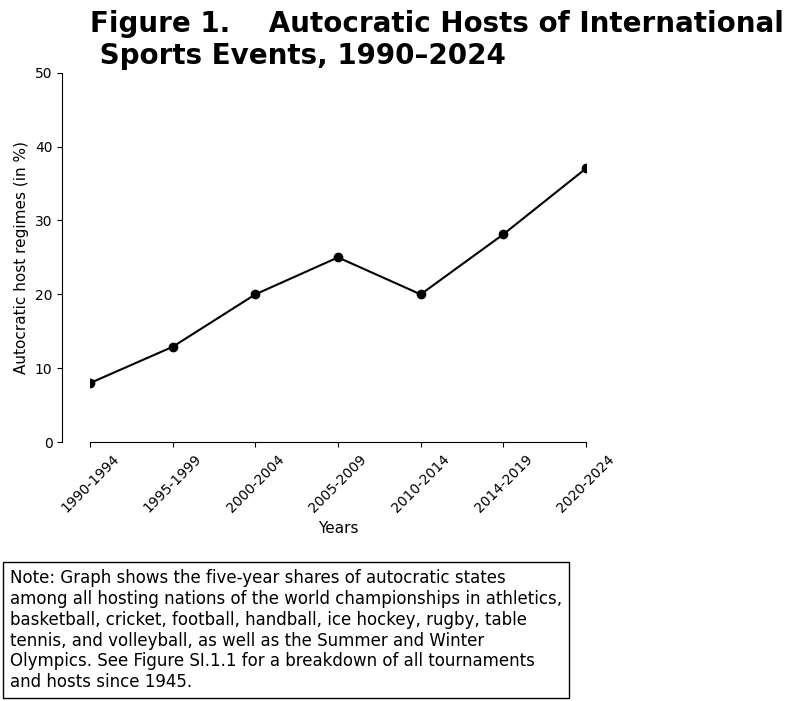

In [8]:
fig, ax = plt.subplots()


plt.title('Figure 1.    Autocratic Hosts of International\n Sports Events, 1990–2024', fontsize=20, loc='left',\
         fontweight="bold")

# Add footnote
plt.figtext(0.0, -0.4, \
"Note: Graph shows the five-year shares of autocratic states\n\
among all hosting nations of the world championships in athletics,\n\
basketball, cricket, football, handball, ice hockey, rugby, table \n\
tennis, and volleyball, as well as the Summer and Winter\n\
Olympics. See Figure SI.1.1 for a breakdown of all tournaments\n\
and hosts since 1945.", ha="left", fontsize=12, bbox={"facecolor":"white", "pad":5})

_ = ax.plot( fig1['Years'], fig1['autochostperc'], marker='o', c='black')

# Add space between axis
ax.spines['left'].set_position(('outward', 20))

plt.xticks(rotation=45)
# 0-6 corresponds to the categories we have for x axis
plt.xlim((0, 6))
plt.ylim(0, 50)

plt.xlabel('Years', fontsize=11) 
plt.ylabel('Autocratic host regimes (in %)', fontsize=11)